In [1]:
from matplotlib import pylab as pylab
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, SimilarityTransform, AffineTransform, resize
import cv2
import numpy as np
from skimage import data
from skimage.util import img_as_float
from skimage.exposure import rescale_intensity
from skimage.measure import ransac

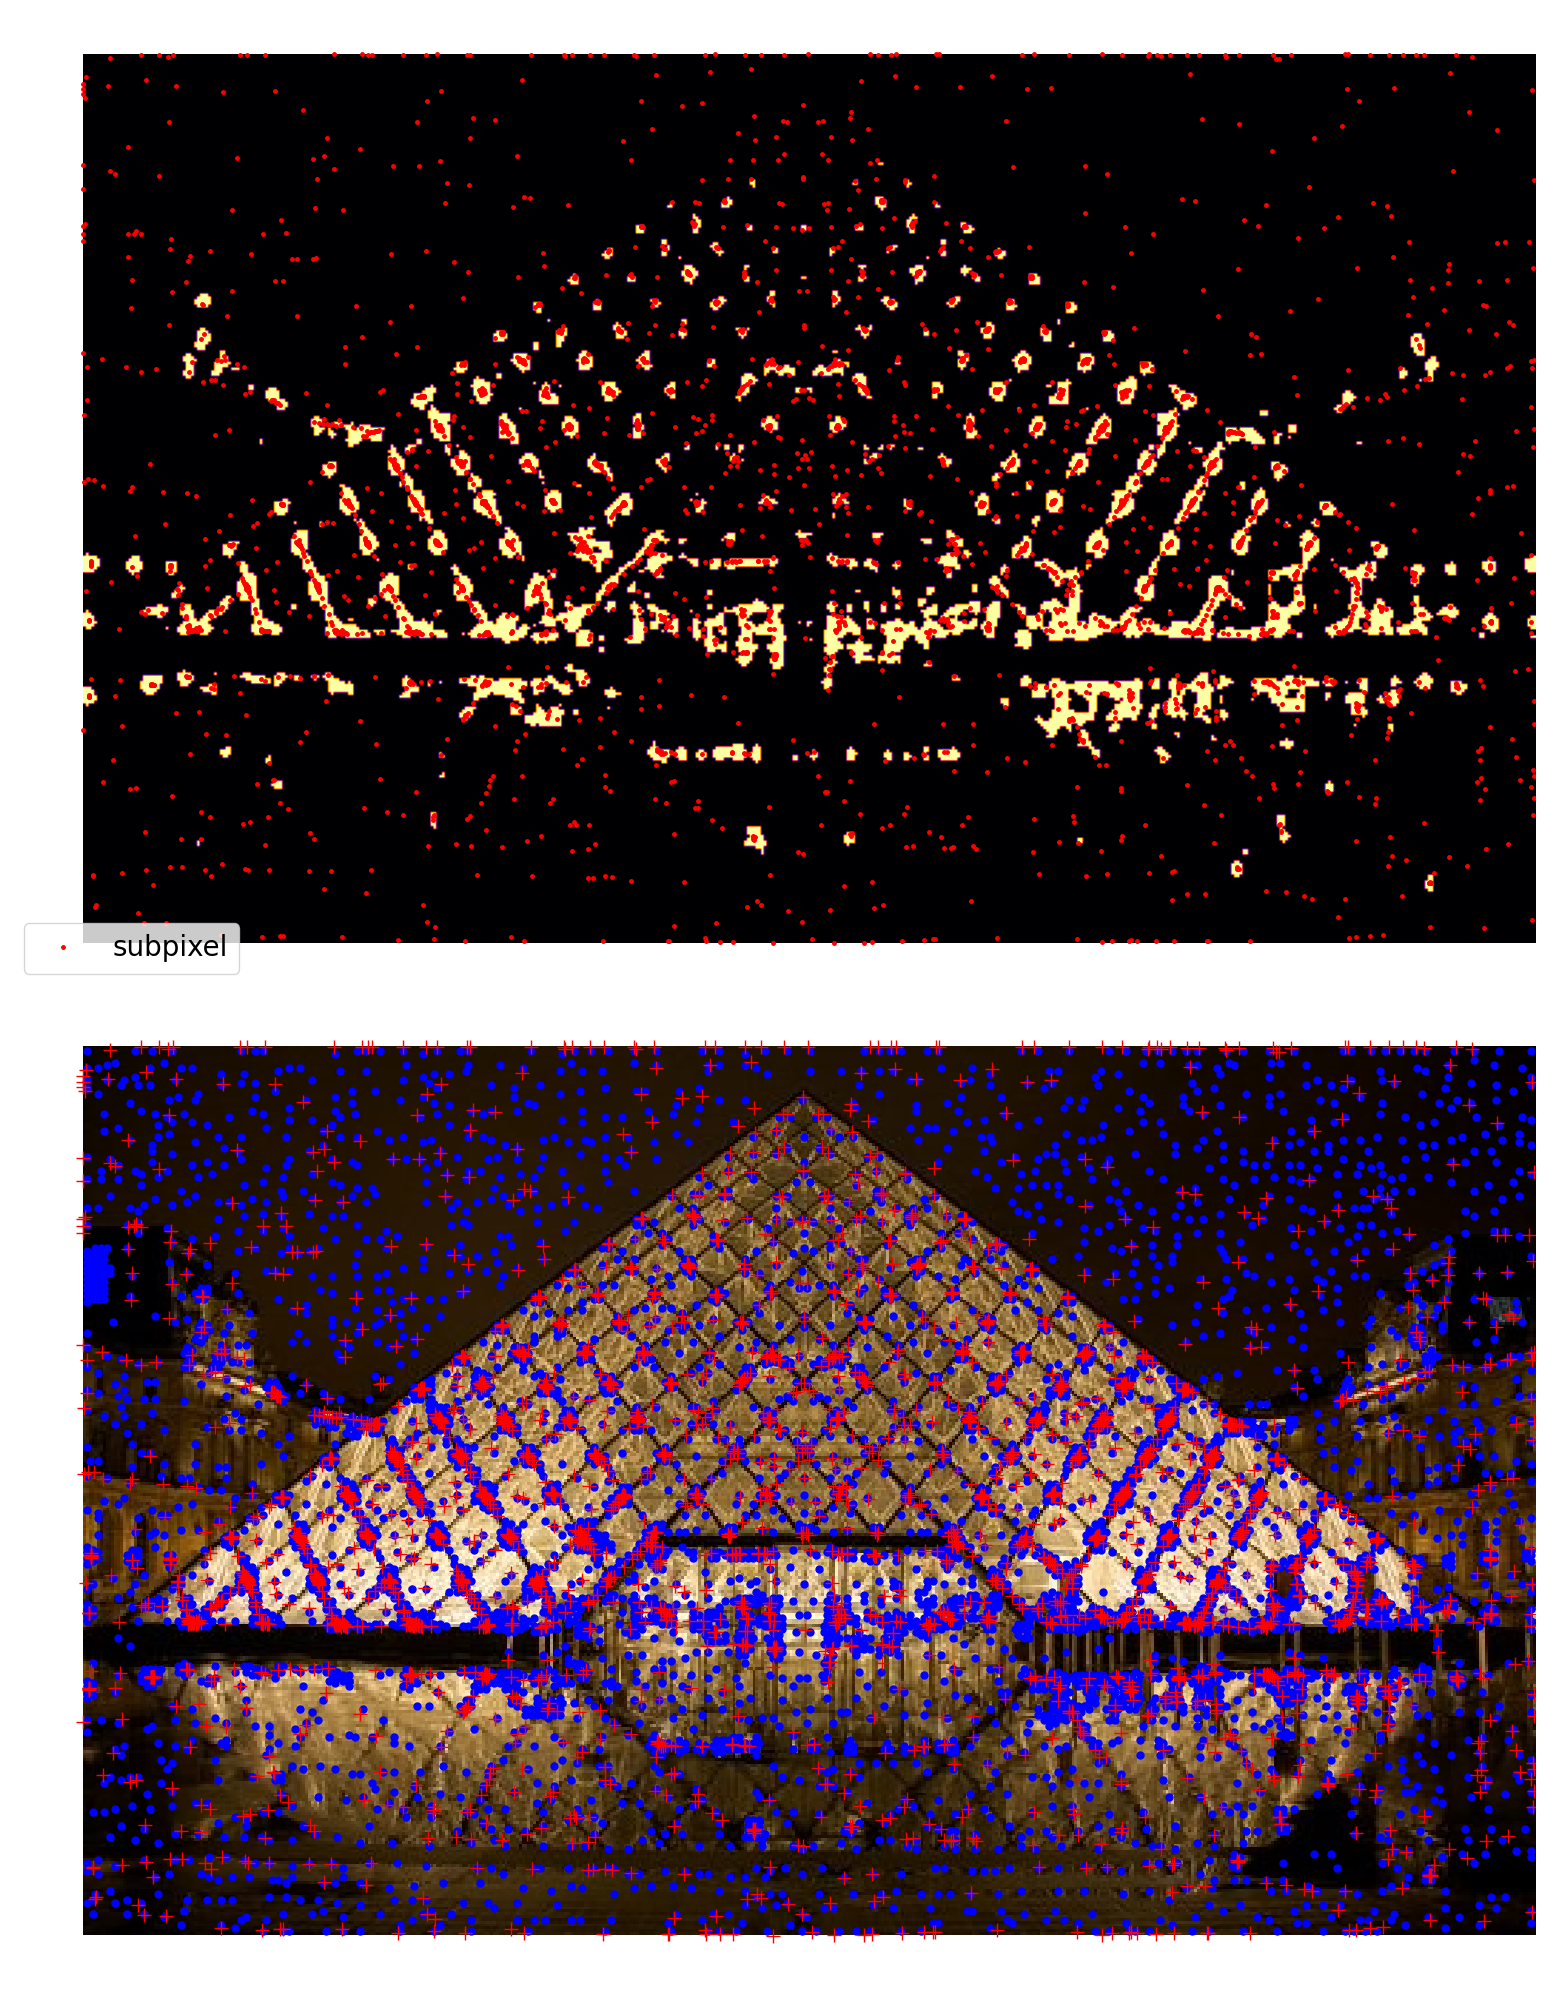

(None, None)

In [2]:
image = imread('D:/ĐH/Xử lý ảnh/BTL/images/pyramids2.jpg')
image_gray = rgb2gray(image)
coordinates = corner_harris(image_gray, k =0.001)
coordinates[coordinates > 0.03*coordinates.max()] = 255 
corner_coordinates = corner_peaks(coordinates)
coordinates_subpix = corner_subpix(image_gray, corner_coordinates, window_size=11)
pylab.figure(figsize=(20,20))
pylab.subplot(211), pylab.imshow(coordinates, cmap='inferno')
pylab.plot(coordinates_subpix[:, 1], coordinates_subpix[:, 0], 'r.', markersize=5, label='subpixel')
pylab.legend(prop={'size': 20}), pylab.axis('off')
pylab.subplot(212), pylab.imshow(image, interpolation='nearest')
pylab.plot(corner_coordinates[:, 1], corner_coordinates[:, 0], 'bo', markersize=5)
pylab.plot(coordinates_subpix[:, 1], coordinates_subpix[:, 0], 'r+', markersize=10), pylab.axis('off')
pylab.tight_layout(), pylab.show()

(256, 256) 2048


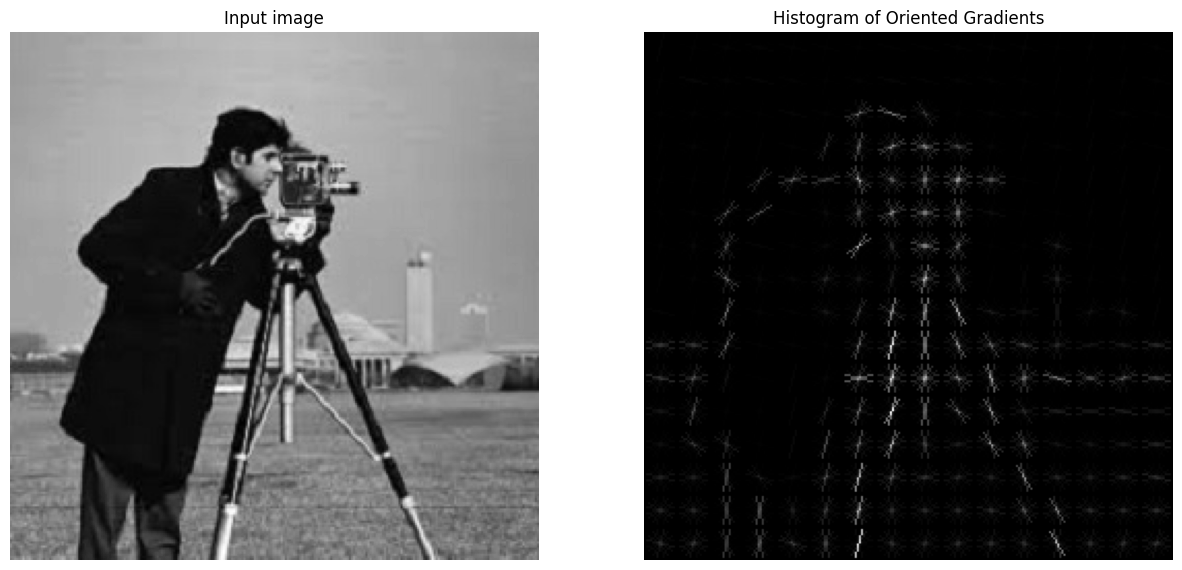

In [6]:
from skimage.feature import hog
from skimage import exposure
image = rgb2gray(imread('D:/ĐH/Xử lý ảnh/BTL/images/cameraman.jpg'))
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
print(image.shape, len(fd))
# ((256L, 256L), 2048)
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(15, 10), sharex=True, sharey=True)
axes1.axis('off'), axes1.imshow(image, cmap=pylab.cm.gray),
axes1.set_title('Input image')
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
axes2.axis('off'), axes2.imshow(hog_image_rescaled, cmap=pylab.cm.gray),
axes2.set_title('Histogram of Oriented Gradients')
pylab.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22312\671673922.py:29: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(axes[0], img1, img2, keypoints1, keypoints2, matches12)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22312\671673922.py:32: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  plot_matches(axes[1], img1, img3, keypoints1, keypoints3, matches13)


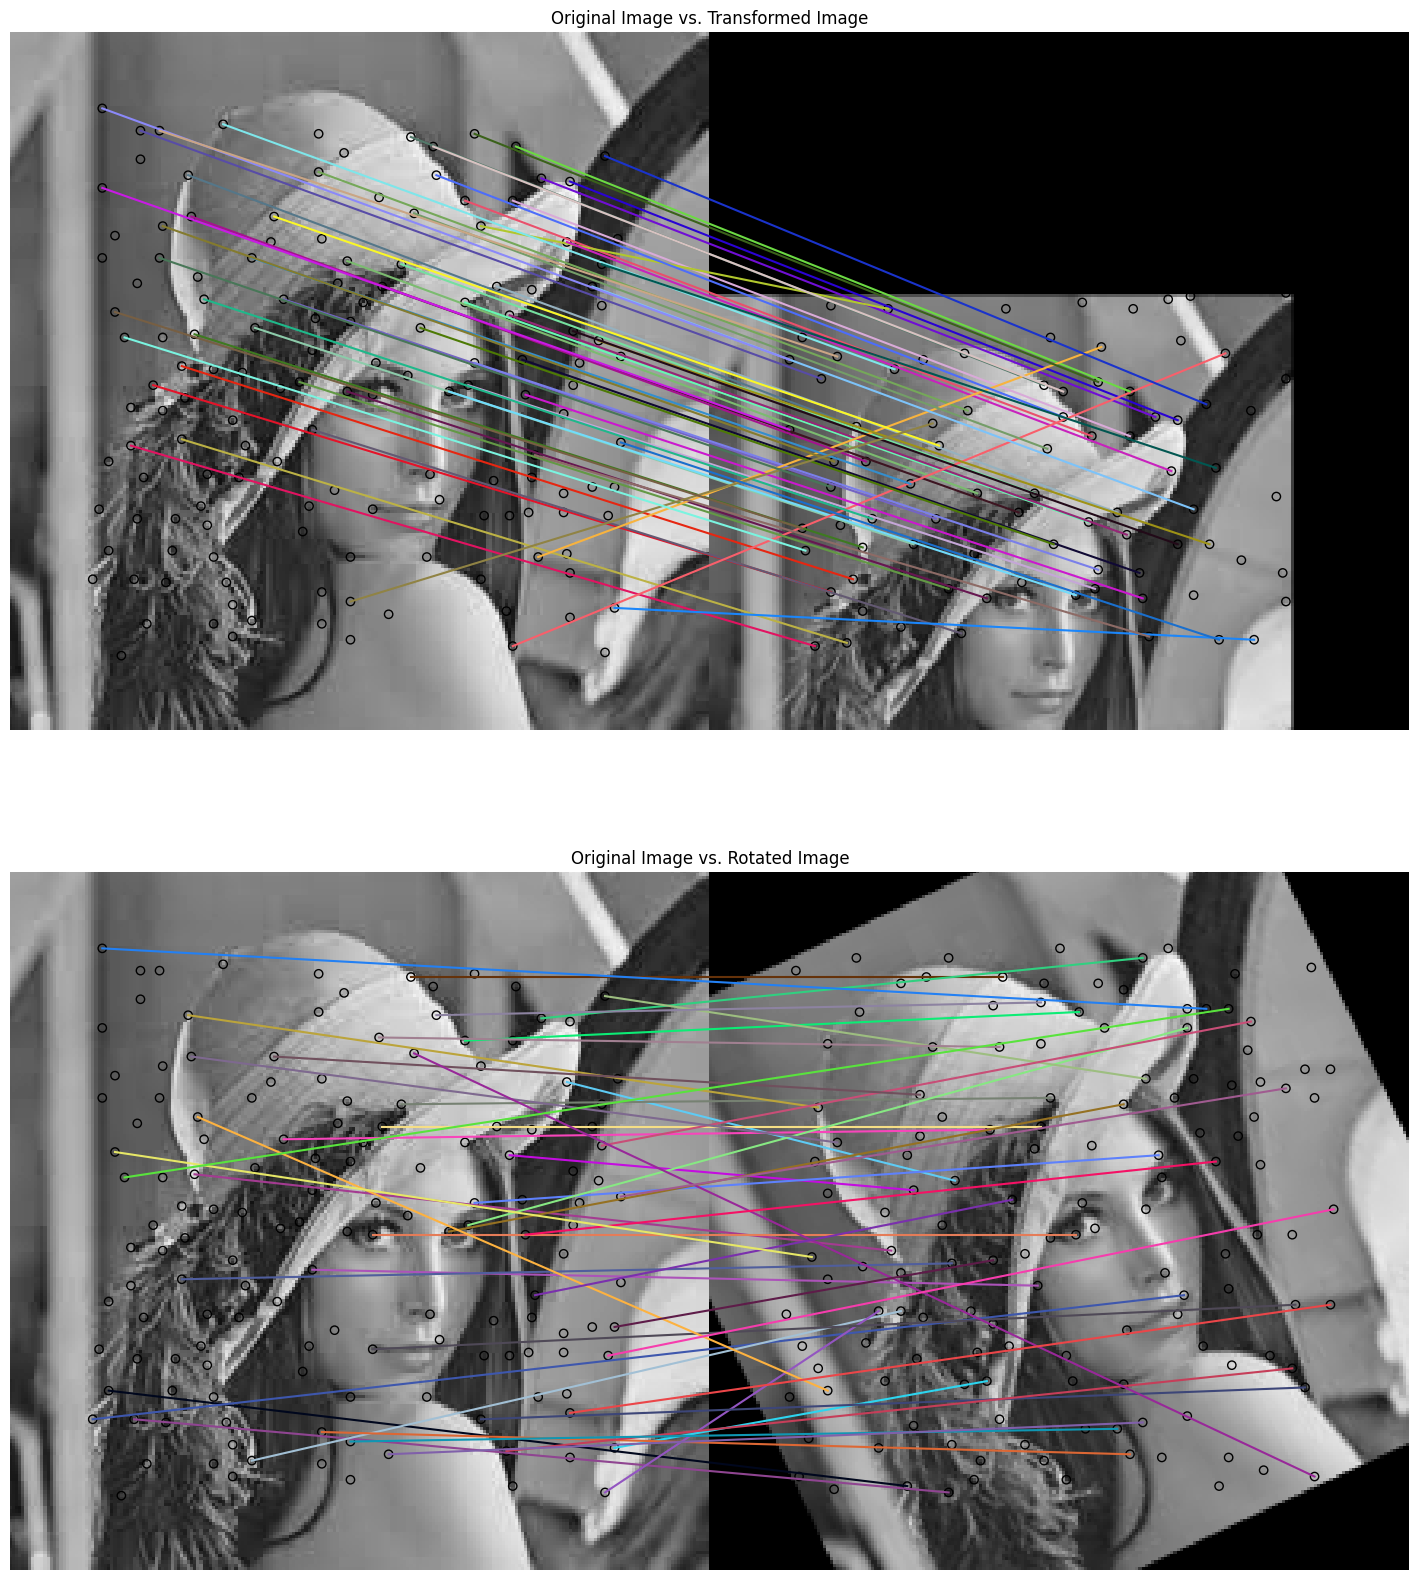

In [8]:
from skimage import transform as transform
from skimage.feature import (match_descriptors, corner_peaks, corner_harris, plot_matches, BRIEF)
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pylab as pylab

img1 = rgb2gray(imread('D:/ĐH/Xử lý ảnh/BTL/images/lena.jpg'))
affine_trans = transform.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img2 = transform.warp(img1, affine_trans)
img3 = transform.rotate(img1, 25)
coords1, coords2, coords3 = corner_harris(img1), corner_harris(img2), corner_harris(img3)
coords1[coords1 > 0.01 * coords1.max()] = 1
coords2[coords2 > 0.01 * coords2.max()] = 1
coords3[coords3 > 0.01 * coords3.max()] = 1
keypoints1 = corner_peaks(coords1, min_distance=5)
keypoints2 = corner_peaks(coords2, min_distance=5)
keypoints3 = corner_peaks(coords3, min_distance=5)
extractor = BRIEF()
extractor.extract(img1, keypoints1)
keypoints1, descriptors1 = keypoints1[extractor.mask], extractor.descriptors
extractor.extract(img2, keypoints2)
keypoints2, descriptors2 = keypoints2[extractor.mask], extractor.descriptors
extractor.extract(img3, keypoints3)
keypoints3, descriptors3 = keypoints3[extractor.mask], extractor.descriptors
matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)
fig, axes = pylab.subplots(nrows=2, ncols=1, figsize=(20, 20))
pylab.gray()
plot_matches(axes[0], img1, img2, keypoints1, keypoints2, matches12)
axes[0].axis('off')
axes[0].set_title("Original Image vs. Transformed Image")
plot_matches(axes[1], img1, img3, keypoints1, keypoints3, matches13)
axes[1].axis('off')
axes[1].set_title("Original Image vs. Rotated Image")
pylab.show()


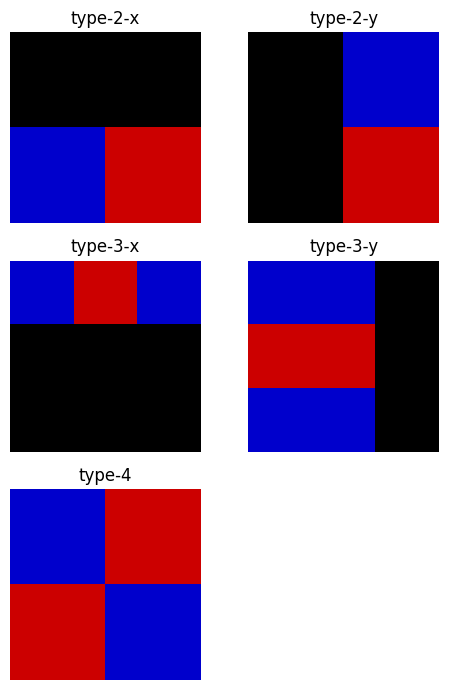

In [12]:
import cv2

img1 = cv2.imread('D:/ĐH/Xử lý ảnh/BTL/images/books.png',0) # queryImage
img2 = cv2.imread('D:/ĐH/Xử lý ảnh/BTL/images/book.png',0) # trainImage

from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature
images = [np.zeros((2, 2)), np.zeros((2, 2)), np.zeros((3, 3)), np.zeros((3, 3)), np.zeros((2, 2))]
feature_types = ['type-2-x', 'type-2-y', 'type-3-x', 'type-3-y', 'type-4']
fig, axes = pylab.subplots(3, 2, figsize=(5, 7))
for axes, img, feat_t in zip(np.ravel(axes), images, feature_types):
    coordinates, _ = haar_like_feature_coord(img.shape[0], img.shape[1], feat_t)
    haar_feature = draw_haar_like_feature(img, 0, 0, img.shape[0], img.shape[1], coordinates, max_n_features=1, color_positive_block=(1.0, 0.0, 0.0), color_negative_block=(0.0, 0.0, 1.0), alpha=0.8)
    axes.imshow(haar_feature)
    axes.set_title(feat_t)
    axes.set_axis_off()
pylab.axis('off')
pylab.tight_layout()
pylab.show()